In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop('CustomerID', axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df=df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# visualization

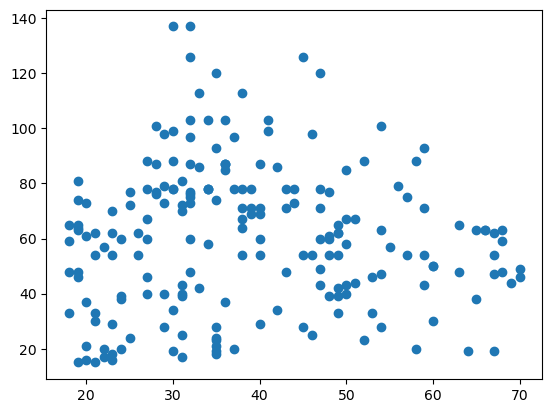

In [10]:
plt.scatter(df.age,df.income)

Text(0.5, 1.0, 'Age and Score plot')

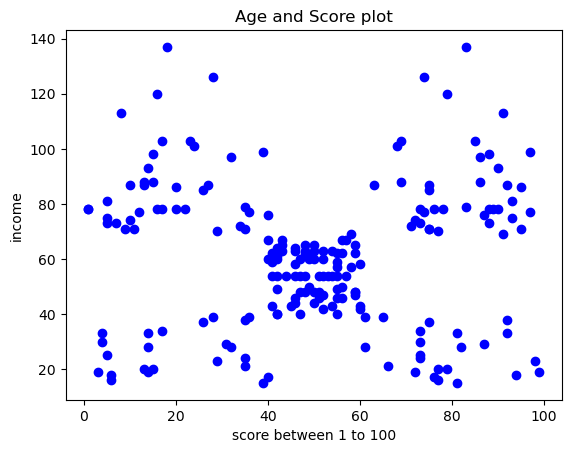

In [11]:
plt.scatter(df.score, df.income, color='blue')
plt.xlabel('score between 1 to 100')
plt.ylabel('income')
plt.title('Age and Score plot')

# pairplot

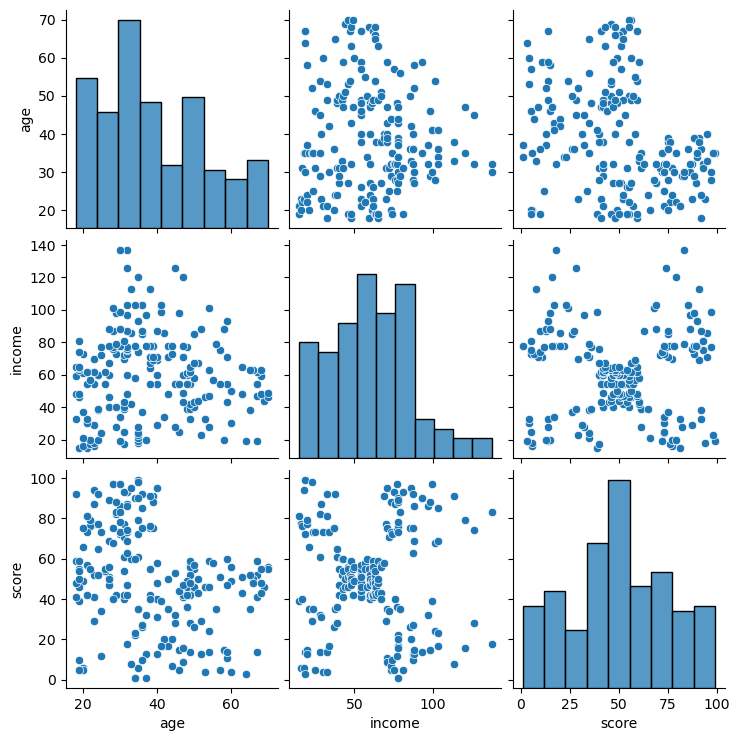

In [12]:
sns.pairplot(df[['age','income','score']])

# K-Means Cluster

In [13]:
from sklearn.cluster import KMeans

# optimizin cluster

In [14]:
km = KMeans(n_clusters=5)
km.fit(df[['score','income']])

KMeans(n_clusters=5)

In [15]:
df['optimize_clusters']=km.predict(df[['score','income']])
df.head()

,gender,age,income,score,optimize_clusters
0,Male,19,15,39,1
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,1


In [16]:
centrer = km.cluster_centers_
centrer

array([[49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ]])

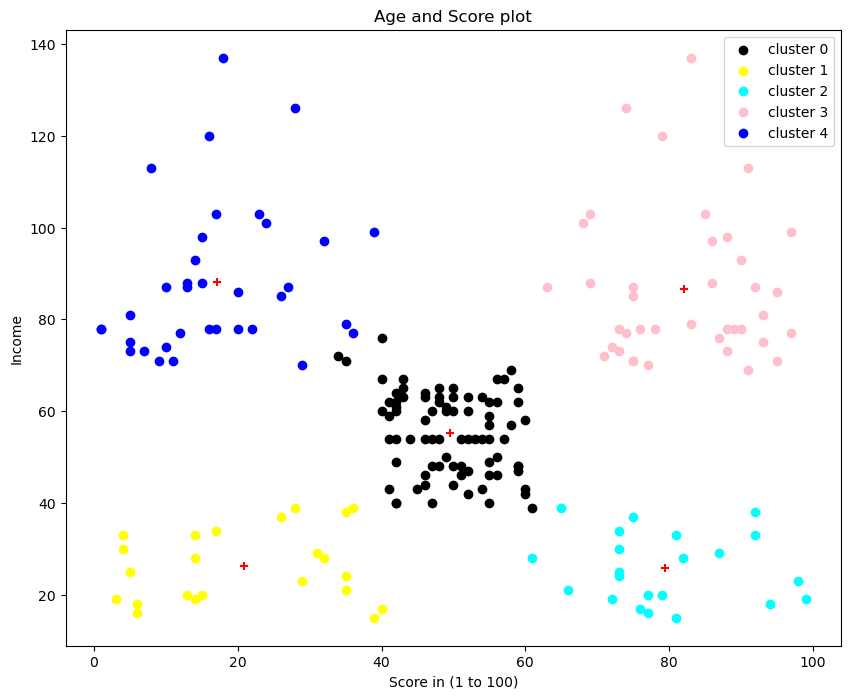

In [17]:
df0=df[df.optimize_clusters==0]
df1=df[df.optimize_clusters==1]
df2=df[df.optimize_clusters==2]
df3=df[df.optimize_clusters==3]
df4=df[df.optimize_clusters==4]

plt.figure(figsize=(10,8))

plt.scatter(df0.score,df0.income, color='black', label='cluster 0')
plt.scatter(df1.score,df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score,df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score,df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score,df4.income, color='blue', label='cluster 4')

plt.scatter(centrer[:,0], centrer[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()



# optimizing kmeans

In [18]:
wcss = []
clusters_range =range(1,15)

for k in clusters_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\Users\MD SHAHADAT KABIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30259.65720728547,
 24995.969781135962,
 21818.114588452183,
 20022.611567624397,
 17595.28888108518,
 16041.057716157717,
 14438.165434565435,
 13182.43750219079]

Text(0.5, 0, 'clusters')

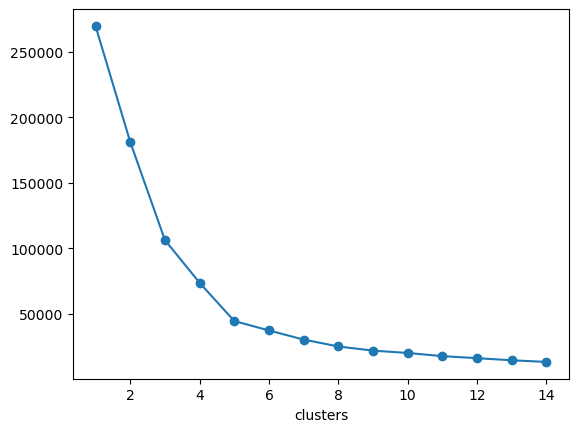

In [20]:
plt.plot(clusters_range, wcss, marker='o')
plt.xlabel('clusters')

In [21]:
!pip install Kneed

In [26]:
from kneed import KneeLocator
kn =KneeLocator(clusters_range, wcss, curve='convex', direction='decreasing')

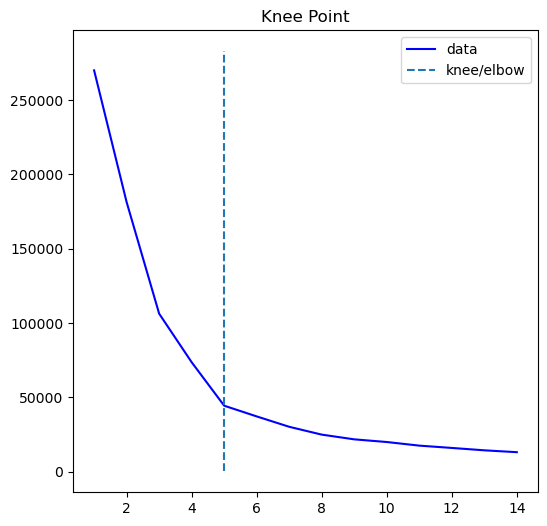

In [27]:
kn.plot_knee()

In [28]:
kn

In [29]:
kn.knee

5